In [1]:
import sys
import os
sys.path.append('../source')
sys.path.append('../source/miq')

import chip
import position as pos
import focus
import utils

# Load a Micro-Manager instance
mmc = utils.get_stage_controller()
print ("Stage at: (", mmc.getXPosition(), 
       ",", mmc.getYPosition(), ")")

Stage at: ( -15389.1 , 4824.900000000001 )


In [ ]:
''' Name chip and give directory to save in '''
chip_number = '0001'
save_dir = '/home/cellcounter/data/' + chip_number + '/'
os.makedirs(save_dir, exist_ok=True)

## Alignment

In [2]:
''' Move the Stage to the bottom right alignment mark of the chip 
    (when looking through the scope) '''
p1 = pos.StagePosition(x=mmc.getXPosition(),
                       y=mmc.getYPosition())

In [3]:
''' Move the Stage to the bottom left alignment mark of the chip '''
p2 = pos.StagePosition(x=mmc.getXPosition(),
                       y=mmc.getYPosition())

In [4]:
''' Move the Stage to the top left alignment mark of the chip '''
p3 = pos.StagePosition(x=mmc.getXPosition(),
                       y=mmc.getYPosition())

In [5]:
# Create a Position List of the corners and save it
corners = pos.PositionList(positions=[p1,p2,p3])
corners.save(chip_number + '_corners', save_dir)

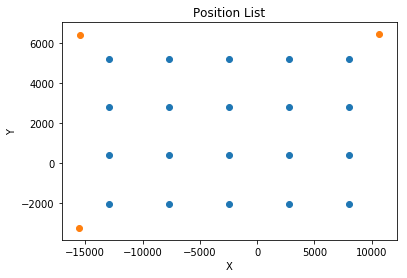

In [6]:
# Create a chip instance and visualize the focus Position List 
current_chip = chip.Chip(corners)
focus_pl = current_chip.get_focus_position_list(5,4)
focus_pl.visualize(xy=True)
current_chip.corner_poslist.visualize(xy=True)

In [7]:
focused_pl = focus.focus_from_last_point(focus_pl, mmc)
focused_pl.save(chip_number + '_focused', save_dir)
imaging_pl = current_chip.get_position_list(focused_pl)
imaging_pl.image(mmc, save_dir)

Instructions for updating:
Use the `axis` argument instead
INFO:tensorflow:Restoring parameters from model.ckpt-1000042
Completed focus in 67.57311129570007 seconds


## Load previously saved Positions

In [9]:
current_chip = chip.Chip(pos.load(chip_number + '_corners', save_dir))
focused_pl = pos.load(chip_number + '_focused', save_dir)
imaging_pl = current_chip.get_position_list(focused_pl)
imaging_pl.image(mmc, save_dir)